# Quantinuum Depth Estimation

In [ ]:
# pytket required for working with quantinuum and transpile the circuits:
# !pip install pytket-qiskit
# !pip install pytket-quantinuum

In [1]:
from pytket.extensions.qiskit import AerBackend
from pytket.extensions.qiskit import qiskit_to_tk
from pytket import Circuit

backend = AerBackend()
circ = Circuit(2).H(0).CX(0, 1).measure_all()

# Compilation not needed here as both H and CX are supported gates
result = backend.run_circuit(circ, n_shots=1000)

In [2]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter as draw

circ = Circuit(2)
circ.H(0)
circ.Rz(0.75, 0)
circ.CX(0, 1)
circ.measure_all()

draw(circ) # Draw circuit

In [ ]:
from pytket.extensions.quantinuum import QuantinuumBackend

# Backend for the H1-1 device
h1_backend = QuantinuumBackend("H1-1", machine_debug=True)
compiled_circ = h1_backend.get_compiled_circuit(circ)

draw(compiled_circ) # Draw compiled circuit

In [4]:
compiled_circ.depth()

4

# Quantinuum price estimation

Quantinuum uses a credit system that charges each job depending on the number of operations in the job, and the number of shots you run. The usage units are H-System Quantum Credits (HQCs) for jobs submitted to quantum computers.

$$\textcolor{orange}{\text{HQC} = 5 + \frac{C}{5000}(N_{1q} + 10N_{2q} + 5N_m)}$$

Where:

- $N_{1q}$ is the number of single-qubit operations in a circuit.
- $N_{2q}$ is the number of native two-qubit operations in a circuit. Native gate is equivalent to CNOT up to several single-qubit gates.
- $N_m$ is the number of state preparation and measurement (SPAM) operations in a circuit including initial implicit state preparation and any intermediate and final measurements and state resets.
- $C$ is the shot count.



In [5]:
import sys
import os

# Tenemos que agregar ".." a nuestro sys.path para usar SteaneCodeCircuit
sys.path.append(os.path.abspath(".."))
from objects.steane_code_circuit import SteaneCodeCircuit
from objects.shor_code_circuit import ShorCodeCircuit
from objects.FiveQbStabilizerCode import FiveQbStabilizerCodeCircuit
from objects.FiveQbPerfectCode import FiveQbPerfectCodeCircuit
from qiskit.circuit import QuantumCircuit, Delay


In [ ]:
print("Encode experiment")

HQC_experiment = 0
total_HQC = 0

# Shor code encode and measurement:
qc_shor = ShorCodeCircuit(logical_qubit_count=1)
qc_shor.encode()
qc_shor.measure_all()

qc = qc_shor.physical_quantum_circuit
tk_circuit = qiskit_to_tk(qc)

compiled_circ = h1_backend.get_compiled_circuit(tk_circuit)

print("Shor code encode and measurement circuit")
print(f"    Circuit depth: {compiled_circ.depth()}")
print(f"    1qb gates: {compiled_circ.n_1qb_gates()}")
print(f"    2qb gates: {compiled_circ.n_2qb_gates()}")
print(f"    SPAM operations: 1 (No estate preparation and reset. One measurement)")
print(f"    Shot count: 100")
print(f"    HQC estimation: {5 + (100/5000)*( compiled_circ.n_1qb_gates() + 10*compiled_circ.n_2qb_gates() + 5 )}")

HQC_experiment += 5 + (100/5000)*( compiled_circ.n_1qb_gates() + 10*compiled_circ.n_2qb_gates() + 5 )


# Steane code encode and measurement
qc_steane = SteaneCodeCircuit(logical_qubit_count=1)
qc_steane.encode()
qc_steane.measure_all()

qc = qc_steane.physical_quantum_circuit
tk_circuit = qiskit_to_tk(qc)

compiled_circ = h1_backend.get_compiled_circuit(tk_circuit)

print("Steane code encode and measurement circuit")
print(f"    Circuit depth: {compiled_circ.depth()}")
print(f"    1qb gates: {compiled_circ.n_1qb_gates()}")
print(f"    2qb gates: {compiled_circ.n_2qb_gates()}")
print(f"    SPAM operations: 1 (No estate preparation and reset. One measurement)")
print(f"    Shot count: 100")
print(f"    HQC estimation: {5 + (100/5000)*( compiled_circ.n_1qb_gates() + 10*compiled_circ.n_2qb_gates() + 5)}")

HQC_experiment += 5 + (100/5000)*( compiled_circ.n_1qb_gates() + 10*compiled_circ.n_2qb_gates() + 5 )



# Five qubit stibilizer encode and measurement
qc_5qb_stabilizer = FiveQbStabilizerCodeCircuit(1, show_ancillas=False)

qc_5qb_stabilizer.encode(type='0')
qc_5qb_stabilizer.measure(basis='Z')

qc = qc_5qb_stabilizer.physical_circuit
tk_circuit = qiskit_to_tk(qc)

compiled_circ = h1_backend.get_compiled_circuit(tk_circuit)

print("Five qubit stabilizer code encode and measurement circuit")
print(f"    Circuit depth: {compiled_circ.depth()}")
print(f"    1qb gates: {compiled_circ.n_1qb_gates()}")
print(f"    2qb gates: {compiled_circ.n_2qb_gates()}")
print(f"    SPAM operations: 1 (No estate preparation and reset. One measurement)")
print(f"    Shot count: 100")
print(f"    HQC estimation: {5 + (100/5000)*( compiled_circ.n_1qb_gates() + 10*compiled_circ.n_2qb_gates() + 5)}")

HQC_experiment += 5 + (100/5000)*( compiled_circ.n_1qb_gates() + 10*compiled_circ.n_2qb_gates() + 5 )



# Five qubit perfect code:
qc_5qb_perfect = FiveQbPerfectCodeCircuit(1)
qc_5qb_perfect.encode(type='0')
qc_5qb_perfect.measure(basis='Z')

qc = qc_5qb_perfect.physical_circuit
tk_circuit = qiskit_to_tk(qc)

compiled_circ = h1_backend.get_compiled_circuit(tk_circuit)


print("Five qubit perfect code encode and measurement circuit")
print(f"    Circuit depth: {compiled_circ.depth()}")
print(f"    1qb gates: {compiled_circ.n_1qb_gates()}")
print(f"    2qb gates: {compiled_circ.n_2qb_gates()}")
print(f"    SPAM operations: 1 (No estate preparation and reset. One measurement)")
print(f"    Shot count: 100")
print(f"    HQC estimation: {5 + (100/5000)*( compiled_circ.n_1qb_gates() + 10*compiled_circ.n_2qb_gates() + 5)}")

HQC_experiment += 5 + (100/5000)*( compiled_circ.n_1qb_gates() + 10*compiled_circ.n_2qb_gates() + 5 )

print(f"\nTotal HQC for the experiment: {HQC_experiment}")

total_HQC += HQC_experiment


Encode experiment
Shor code encode and measurement circuit
    Circuit depth: 17
    1qb gates: 20
    2qb gates: 17
    SPAM operations: 1 (No estate preparation and reset. One measurement)
    Shot count: 100
    HQC estimation: 8.9
Steane code encode and measurement circuit
    Circuit depth: 17
    1qb gates: 20
    2qb gates: 18
    SPAM operations: 1 (No estate preparation and reset. One measurement)
    Shot count: 100
    HQC estimation: 9.1
Five qubit stabilizer code encode and measurement circuit
    Circuit depth: 18
    1qb gates: 21
    2qb gates: 10
    SPAM operations: 1 (No estate preparation and reset. One measurement)
    Shot count: 100
    HQC estimation: 7.52
Five qubit perfect code encode and measurement circuit
    Circuit depth: 9
    1qb gates: 11
    2qb gates: 5
    SPAM operations: 1 (No estate preparation and reset. One measurement)
    Shot count: 100
    HQC estimation: 6.32

Total HQC for the experiment: 31.84


Encode and error correction experiment
Delay experiment (without error correction) - 10 circuits for each code
Steane code time delay
    1qb gates: 200
    2qb gates: 180
    SPAM operations: 10 (No estate preparation and reset. One measurement per circuit)
    Shot count: 1000 (100 shots per circuit)
    HQC estimation: 90.99999999999999


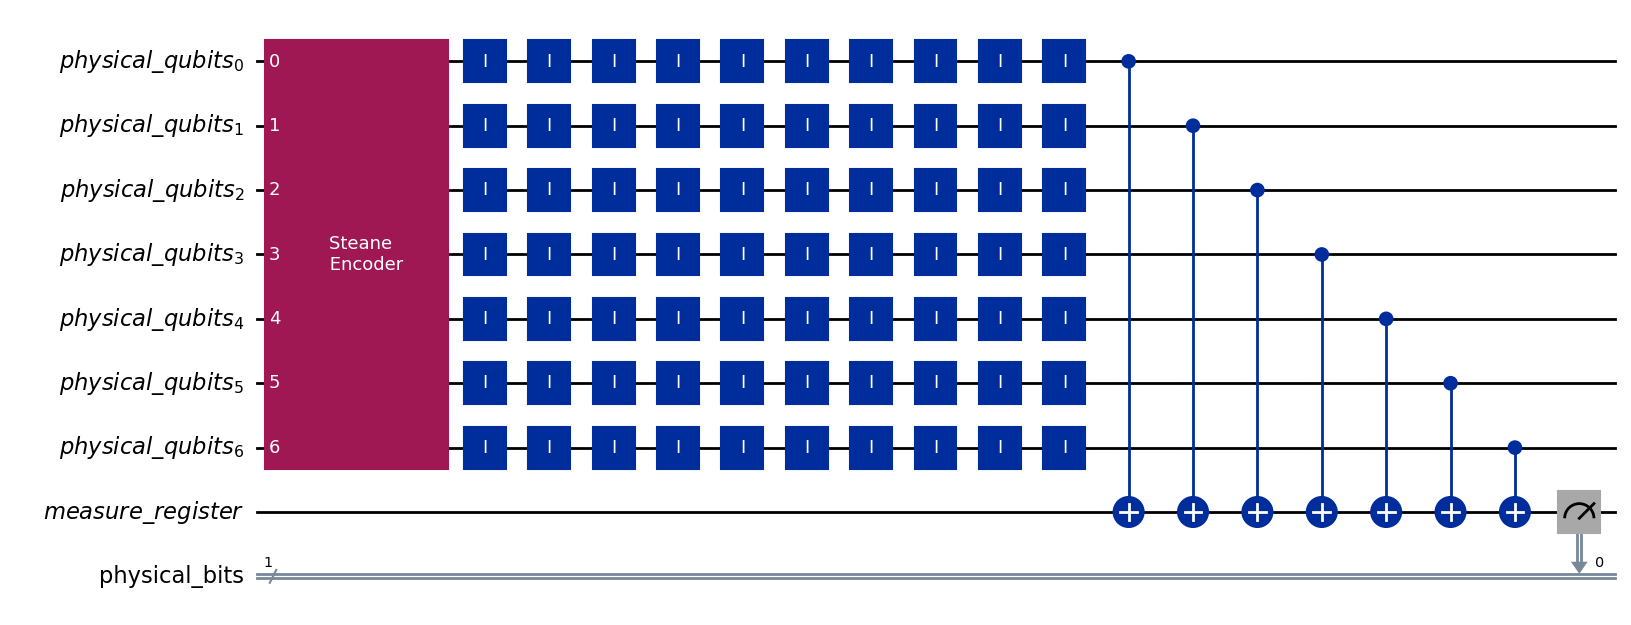

In [24]:
print("Encode and error correction experiment")

# Shor code delay experiment

HQC_experiment = 0
dt = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
circuits = []

print(f"Delay experiment (without error correction) - {len(dt)} circuits for each code")

n_1qb_gates = 0
n_2qb_gates = 0
n_SPAM_operations = 0
shot_count = 0


for t in dt:
    # Generamos el circuitio sin corrección de errores:
    qc_steane = SteaneCodeCircuit(logical_qubit_count=1)
    qc_steane.encode()

    for i in range(t):
        qc_steane.id(0) # Podemos agregar el delay cómo append unitary error

    qc_steane.measure_all()

    # Extraemos el QuantumCircuit físico y lo transpilamos
    qc = qc_steane.physical_quantum_circuit


    tk_circuit = qiskit_to_tk(qc)

    compiled_circ = h1_backend.get_compiled_circuit(tk_circuit)

    n_1qb_gates += compiled_circ.n_1qb_gates()
    n_2qb_gates += compiled_circ.n_2qb_gates()
    n_SPAM_operations += 1
    shot_count += 100

    HQC_experiment += 5 + (100/5000)*( compiled_circ.n_1qb_gates() + 10*compiled_circ.n_2qb_gates() + 5)



print(f"Steane code time delay")
print(f"    1qb gates: {n_1qb_gates}")
print(f"    2qb gates: {n_2qb_gates}")
print(f"    SPAM operations: {n_SPAM_operations} (No estate preparation and reset. One measurement per circuit)")
print(f"    Shot count: {shot_count} (100 shots per circuit)")
print(f"    HQC estimation: {HQC_experiment}")

draw(compiled_circ)
qc.draw("mpl")

    


In [27]:
print("Encode and error correction procedure")

HQC_experiment = 0

# Shor code encode and measurement:
qc_shor = ShorCodeCircuit(logical_qubit_count=1)
qc_shor.encode()
qc_shor.correct(correction_method='stabilizers')
qc_shor.measure_all()

qc = qc_shor.physical_quantum_circuit
tk_circuit = qiskit_to_tk(qc)

compiled_circ = h1_backend.get_compiled_circuit(tk_circuit)

print("Shor code encode and error correction circuit")
print(f"    Circuit depth: {compiled_circ.depth()}")
print(f"    1qb gates: {compiled_circ.n_1qb_gates()}")
print(f"    2qb gates: {compiled_circ.n_2qb_gates()}")
print(f"    SPAM operations: 1 (No estate preparation and reset. One measurement)")
print(f"    Shot count: 100")
print(f"    HQC estimation: {5 + (100/5000)*( compiled_circ.n_1qb_gates() + 10*compiled_circ.n_2qb_gates() + 5 )}")

HQC_experiment += 5 + (100/5000)*( compiled_circ.n_1qb_gates() + 10*compiled_circ.n_2qb_gates() + 5 )


# Steane code encode and measurement
qc_steane = SteaneCodeCircuit(logical_qubit_count=1)
qc_steane.encode()
qc_steane.correct()
qc_steane.measure_all()

qc = qc_steane.physical_quantum_circuit
tk_circuit = qiskit_to_tk(qc)

compiled_circ = h1_backend.get_compiled_circuit(tk_circuit)

print("Steane code encode  circuit")
print(f"    Circuit depth: {compiled_circ.depth()}")
print(f"    1qb gates: {compiled_circ.n_1qb_gates()}")
print(f"    2qb gates: {compiled_circ.n_2qb_gates()}")
print(f"    SPAM operations: 1 (No estate preparation and reset. One measurement)")
print(f"    Shot count: 100")
print(f"    HQC estimation: {5 + (100/5000)*( compiled_circ.n_1qb_gates() + 10*compiled_circ.n_2qb_gates() + 5)}")

HQC_experiment += 5 + (100/5000)*( compiled_circ.n_1qb_gates() + 10*compiled_circ.n_2qb_gates() + 5 )



# Five qubit stibilizer encode and measurement
qc_5qb_stabilizer = FiveQbStabilizerCodeCircuit(1, show_ancillas=True)

qc_5qb_stabilizer.encode(type='0')
qc_5qb_stabilizer.spot_syndrome()
qc_5qb_stabilizer.correct()
qc_5qb_stabilizer.measure(basis='Z')

qc = qc_5qb_stabilizer.physical_circuit
tk_circuit = qiskit_to_tk(qc)

compiled_circ = h1_backend.get_compiled_circuit(tk_circuit)

print("Five qubit stabilizer code encode and measurement circuit")
print(f"    Circuit depth: {compiled_circ.depth()}")
print(f"    1qb gates: {compiled_circ.n_1qb_gates()}")
print(f"    2qb gates: {compiled_circ.n_2qb_gates()}")
print(f"    SPAM operations: 1 (No estate preparation and reset. One measurement)")
print(f"    Shot count: 100")
print(f"    HQC estimation: {5 + (100/5000)*( compiled_circ.n_1qb_gates() + 10*compiled_circ.n_2qb_gates() + 5)}")

HQC_experiment += 5 + (100/5000)*( compiled_circ.n_1qb_gates() + 10*compiled_circ.n_2qb_gates() + 5 )



# Five qubit perfect code:
qc_5qb_perfect = FiveQbPerfectCodeCircuit(1)
qc_5qb_perfect.encode(type='0')
qc_5qb_perfect.decode()
qc_5qb_perfect.correct()
qc_5qb_perfect.measure()

qc = qc_5qb_perfect.physical_circuit
tk_circuit = qiskit_to_tk(qc)

compiled_circ = h1_backend.get_compiled_circuit(tk_circuit)


print("Five qubit perfect code encode and measurement circuit")
print(f"    Circuit depth: {compiled_circ.depth()}")
print(f"    1qb gates: {compiled_circ.n_1qb_gates()}")
print(f"    2qb gates: {compiled_circ.n_2qb_gates()}")
print(f"    SPAM operations: 1 (No estate preparation and reset. One measurement)")
print(f"    Shot count: 100")
print(f"    HQC estimation: {5 + (100/5000)*( compiled_circ.n_1qb_gates() + 10*compiled_circ.n_2qb_gates() + 5)}")

HQC_experiment += 5 + (100/5000)*( compiled_circ.n_1qb_gates() + 10*compiled_circ.n_2qb_gates() + 5 )

print(f"\nTotal HQC for the experiment: {HQC_experiment}")

total_HQC += HQC_experiment



Encode and error correction procedure
[QuantumRegister(8, 'ancilla_qubits'), Qubit(QuantumRegister(9, 'physical_qubits'), 1)]
Shor code encode and error correction circuit
    Circuit depth: 2373
    1qb gates: 2445
    2qb gates: 2075
    SPAM operations: 1 (No estate preparation and reset. One measurement)
    Shot count: 100
    HQC estimation: 469.0
Steane code encode  circuit
    Circuit depth: 373
    1qb gates: 258
    2qb gates: 224
    SPAM operations: 1 (No estate preparation and reset. One measurement)
    Shot count: 100
    HQC estimation: 55.06
Five qubit stabilizer code encode and measurement circuit
    Circuit depth: 761
    1qb gates: 586
    2qb gates: 431
    SPAM operations: 1 (No estate preparation and reset. One measurement)
    Shot count: 100
    HQC estimation: 103.02
Five qubit perfect code encode and measurement circuit
    Circuit depth: 796
    1qb gates: 543
    2qb gates: 424
    SPAM operations: 1 (No estate preparation and reset. One measurement)
    S

In [34]:
"""
Shor code encode and error correction circuit
    Circuit depth: 2383
    1qb gates: 2455
    2qb gates: 2075
    SPAM operations: 1 (No estate preparation and reset. One measurement)
    Shot count: 100
    HQC estimation: 469.2
Steane code encode and error correction circuit
    Circuit depth: 383
    1qb gates: 268
    2qb gates: 224
    SPAM operations: 1 (No estate preparation and reset. One measurement)
    Shot count: 100
    HQC estimation: 55.26
Five qubit stabilizer code encode and error correction circuit
    Circuit depth: 771
    1qb gates: 596
    2qb gates: 431
    SPAM operations: 1 (No estate preparation and reset. One measurement)
    Shot count: 100
    HQC estimation: 103.22
Five qubit perfect code encode and error correction circuit
    Circuit depth: 806
    1qb gates: 553
    2qb gates: 424
    SPAM operations: 1 (No estate preparation and reset. One measurement)
    Shot count: 100
    HQC estimation: 100.96

Total HQC for the experiment: 728.64
"""

print(5 + (100/5000)*( 2455 + 10*2075 + 5 ))
print(5 + (100/5000)*( 268 + 10*224 + 5 ))
print(5 + (100/5000)*( 596 + 10*431 + 5 ))
print(5 + (100/5000)*( 553 + 10*424 + 5 ))

5 + (100/5000)*( 2455 + 10*2075 + 5 ) + 5 + (100/5000)*( 268 + 10*224 + 5 ) + 5 + (100/5000)*( 596 + 10*431 + 5 ) + 5 + (100/5000)*( 553 + 10*424 + 5 )





469.2
55.26
103.22
100.96000000000001


728.6400000000001